In [1]:
# import dependencies
#Load and inspect images using the Python Imaging Library (PIL)
from PIL import Image
import os
import numpy as np
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import requests
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# importing training data set
path = 'augmented_xray_images.pkl'
with open(path, 'rb') as file:
    X_train = pickle.load(file)

In [5]:
# read y training labels for images from csv file
y_train = np.loadtxt('y_augmented_labels.txt')
# display y_train
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [6]:
# importing training data set
path = 'testing_xray_images.pkl'
with open(path, 'rb') as file:
    X_test = pickle.load(file)

In [8]:
# read y training labels for images from csv file
y_test = np.loadtxt('y_testing_labels.txt')
# display y_train
y_test

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [9]:
# define x shape
X_shape = X_train[0].shape
# print shape
X_shape

(224, 224, 1)

In [11]:
# Convert values to numpy arrays
X_train = np.array(X_train)
X_test= np.array(X_test)
y_train= np.array(y_train)
y_test= np.array(y_test)

In [12]:
# Reshape test data for the model
X_test_np = []
for img in X_test:
    # Add a channel dimension for grayscale images
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    # Append the image to the list
    X_test_np.append(img)

# Convert to numpy array
X_test_np = np.array(X_test_np)

# Check the shape of the first image
#X_test_np[0].shape

(224, 224, 1)

In [14]:
# define input shape
input_shape = X_test_np[0].shape
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='sigmoid')  # 6 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs
)

C:\Users\kwan\AppData\Local\anaconda3\envs\dev\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 158s 329ms/step - accuracy: 0.2268 - loss: 1.8443 - val_accuracy: 0.2628 - val_loss: 1.7498
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 155s 326ms/step - accuracy: 0.2311 - loss: 1.7521 - val_accuracy: 0.2641 - val_loss: 1.7502
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 151s 317ms/step - accuracy: 0.2718 - loss: 1.7048 - val_accuracy: 0.3127 - val_loss: 1.7712
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 151s 318ms/step - accuracy: 0.4814 - loss: 1.3209 - val_accuracy: 0.2733 - val_loss: 1.8610
Epoch 5/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 151s 317ms/step - accuracy: 0.8389 - loss: 0.4707 - val_accuracy: 0.1708 - val_loss: 2.2306
Epoch 6/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 154s 323ms/step - accuracy: 0.9762 - loss: 0.0831 - val_accuracy: 0.1997 - val_loss: 3.2252
Epoch 7/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 154s 323ms/step - accuracy: 0.9938 - loss: 0.0202 - val_accuracy: 0.1774 - val_loss: 3.8956
Epoch 8/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 152s 319ms/step - accuracy: 0.9977 -

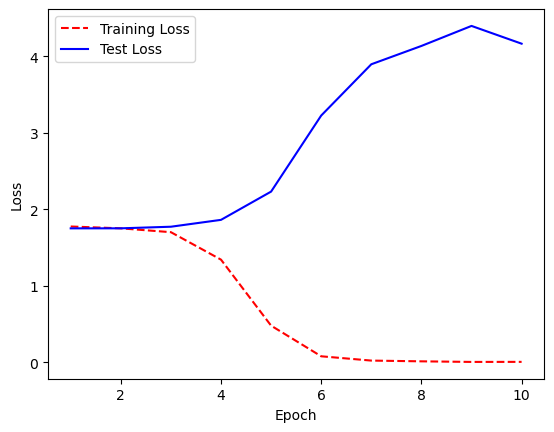

In [15]:
# plotting the traing and testing loss vs epoch
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();